<a href="https://colab.research.google.com/github/mohammadAliMkh/Pytorch/blob/main/MiniFoodVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile
import requests
import os
from pathlib import Path
import random

In [2]:
current_dir = Path.cwd()
folder_name = "MiniFoodVisioin"
full_dir = current_dir/folder_name

if Path.exists(full_dir):
  print("Folder Already Exists...")
else:
  Path.mkdir(full_dir)

In [3]:
file_name = Path.cwd()/"foodvision_mini.zip"

In [4]:
r = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")

with open(file_name , "wb") as f:
  f.write(r.content)

In [5]:
 # loading the temp.zip and creating a zip object
with ZipFile(file_name, 'r') as extract:
  
    # Extracting all the members of the zip 
    # into a specific location.
    extract.extractall(
        path=full_dir)

In [6]:
# how my data folder look like?
print(f"number of files in root folder: {len(os.listdir(full_dir))}\n")

for folder in os.listdir(full_dir):
  print("--- " + folder + " ---")
  sub_folder = full_dir/folder
  for x in os.listdir(sub_folder):
    print("\t" + x + "\t" + f"number of files: {len(os.listdir(sub_folder/x))}")
  print("\n")

number of files in root folder: 2

--- test ---
	pizza	number of files: 25
	sushi	number of files: 31
	steak	number of files: 19


--- train ---
	pizza	number of files: 78
	sushi	number of files: 72
	steak	number of files: 75




In [7]:
# plot some random images in my folders
import matplotlib.pyplot as plt

def plot_images(root_path = full_dir, folder_name = "train" , number_of_rows = 3 , number_of_columns = 3):
  folder_list = os.listdir(full_dir/folder_name)
  plt.figure(figsize = (15 , 10))

  for i in range(number_of_rows * number_of_columns):
    random_folder = random.choice(folder_list)
    random_image = random.choice(os.listdir(root_path/folder_name/random_folder))
    image_path = root_path/folder_name/random_folder/random_image
    image = plt.imread(image_path)

    plt.subplot(number_of_rows , number_of_columns , i + 1)
    plt.imshow(image)
    plt.title(random_folder + " " + str(image.shape))
    plt.axis(False)

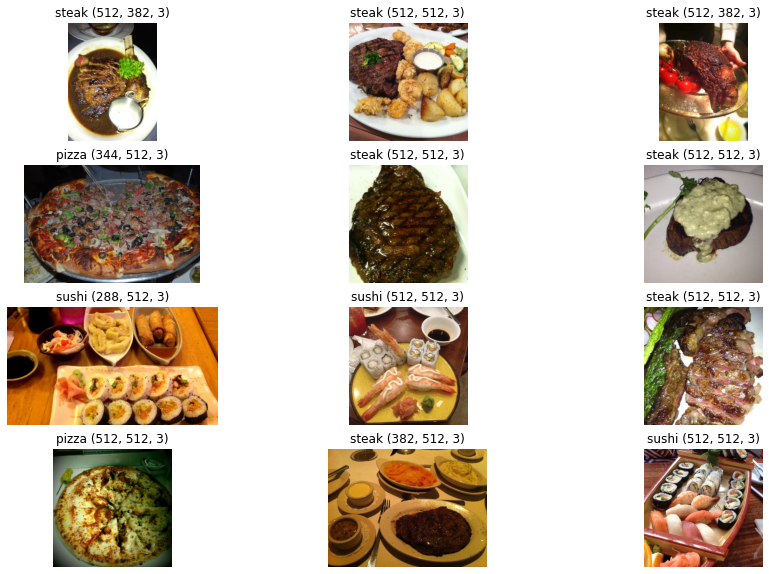

In [8]:
plot_images(folder_name = "test" , number_of_rows = 4 , number_of_columns = 3)

In [9]:
# find minimum size of images in all folders
from PIL import Image

hight_min = 512
width_min = 512
for folder in os.listdir(full_dir):
  for sub_folder in os.listdir(full_dir/folder):
    for image in os.listdir(full_dir/folder/sub_folder):
      
      h_min = Image.open(full_dir/folder/sub_folder/image).size[0]
      w_min = Image.open(full_dir/folder/sub_folder/image).size[1]

      if h_min < hight_min:
        hight_min = h_min
      if w_min < width_min:
        width_min = w_min

print(f"minimum width: {width_min}")
print(f"minimu hight: {hight_min}")
print(f"({width_min} , {hight_min})")     

minimum width: 262
minimu hight: 289
(262 , 289)


In [10]:
from torchvision import transforms
import torch

In [11]:
# we have build transformers in 2 different kinds, let's start with first of them
transformer1 = transforms.Compose([
    transforms.RandomHorizontalFlip(p = 1),
    #transforms.CenterCrop(size = (256  , 256)),
    transforms.Resize(size = (256 , 256)),
    transforms.ToTensor()
])

In [12]:
# for this kind, you can not use transforms.ToTensor() method inside sequestial method, the sequential model need data to be transformed before feeded to it
transformer2 = torch.nn.Sequential(
    transforms.RandomHorizontalFlip(p = 1),
    transforms.Resize(size = (256 , 256)),
    transforms.GaussianBlur(kernel_size = (5 , 5) , sigma = 2)
)

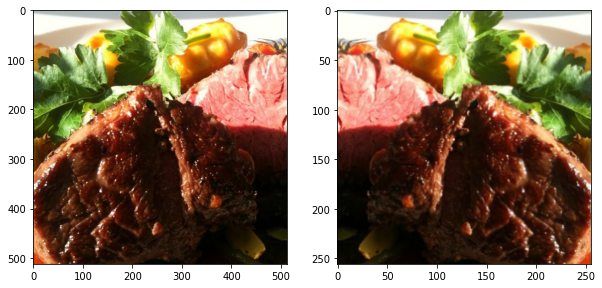

In [13]:
from PIL import Image
image = Image.open("/content/MiniFoodVisioin/test/steak/1285886.jpg")
img = transformer1(image)

plt.figure(figsize = (10 , 7))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1 , 2, 2)
plt.imshow(img.permute((1 , 2 , 0)))

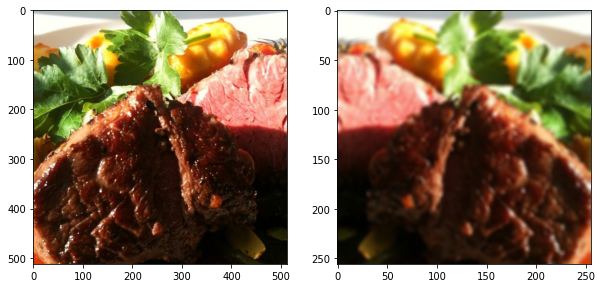

In [14]:
from PIL import Image
image = Image.open("/content/MiniFoodVisioin/test/steak/1285886.jpg")
img = transformer2(image)

plt.figure(figsize = (10 , 7))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1 , 2, 2)
plt.imshow(img)

In [15]:
from torchvision.datasets import ImageFolder

In [16]:
train_imagefolder = ImageFolder(full_dir/"train" , transform = transformer1 , target_transform=None)

In [17]:
test_imagefolder = ImageFolder(full_dir/"test" , transform = transformer1)

In [18]:
test_imagefolder , train_imagefolder

(Dataset ImageFolder
     Number of datapoints: 75
     Root location: /content/MiniFoodVisioin/test
     StandardTransform
 Transform: Compose(
                RandomHorizontalFlip(p=1)
                Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 225
     Root location: /content/MiniFoodVisioin/train
     StandardTransform
 Transform: Compose(
                RandomHorizontalFlip(p=1)
                Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            ))

In [19]:
from torch.utils.data import DataLoader

In [20]:
train_dataLoader = DataLoader(train_imagefolder , batch_size= 1 , shuffle = True , num_workers = 1)
test_dataLoader = DataLoader(test_imagefolder , batch_size = 1 , num_workers = 1)

In [21]:
img , label = next(iter(train_dataLoader))

(-0.5, 255.5, 255.5, -0.5)

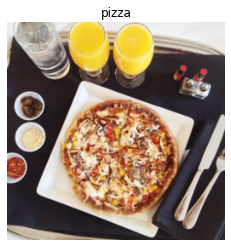

In [22]:
plt.imshow(torch.squeeze(img , dim = 0).permute(1 , 2 , 0))
plt.title(train_imagefolder.classes[label.item()])
plt.axis(False)

In [23]:
train_dir = full_dir/"train"
test_dir = full_dir/"test"

In [24]:
def return_targets_with_labels(directory):
  '''returning targets names and targets with their ID
  
  Input:
  ... valid file directory path

  Output:
  ... targets -> list
  ... targets with ID -> dictionary
  '''
  classes = []

  for name in list(os.scandir(directory)):
    classes.append(name.name)
  
  if not classes:
    raise(f"couldn't find any classes in {directory}... please check the directory structure")
  
  return sorted(classes) , {class_name: i for i , class_name in enumerate(sorted(classes))}

In [25]:
targets , targets_with_idx = return_targets_with_labels(test_dir)

In [26]:
targets , targets_with_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [27]:
from typing import Tuple


#creating a custom ImageFolder Loader
from torch.utils.data import Dataset

class CustomDataLoader(Dataset):
  ''' a custom data loader'''

  def __init__(self, dir:str , transform = None):
    self.paths = list(Path(dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes , self.classes_idx = return_targets_with_labels(dir)

  def load_image(self , index:int) -> Image.Image:
    return Image.open(self.paths[index])

  def __len__(self):
    return len(self.paths)

  def __getitem__(self, index:int) -> Tuple[torch.Tensor , int]:

    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.classes_idx[class_name]

    if self.transform:
      return self.transform(img) , class_idx
    else:
      return transforms.ToTensor()(img) , class_idx

In [28]:
a = CustomDataLoader(train_dir)
len(a)

225

In [29]:
image , target = random.choice(a)

In [30]:
def plot_random_images_from_our_custom_dataset(dataset , number_of_rows = 3 , number_of_columns = 3):
  ''' plot some random images from our custom dataset'''

  plt.figure(figsize = (15 , 10))
  for i in range(number_of_rows * number_of_columns):
    random_image , random_target = random.choice(dataset)
    plt.subplot(number_of_rows , number_of_columns , i + 1)
    plt.imshow(random_image.permute((1 , 2 , 0)))
    plt.title(dataset.classes[random_target] + "\n" + str(random_image.shape[1:]))
    plt.axis(False)
    

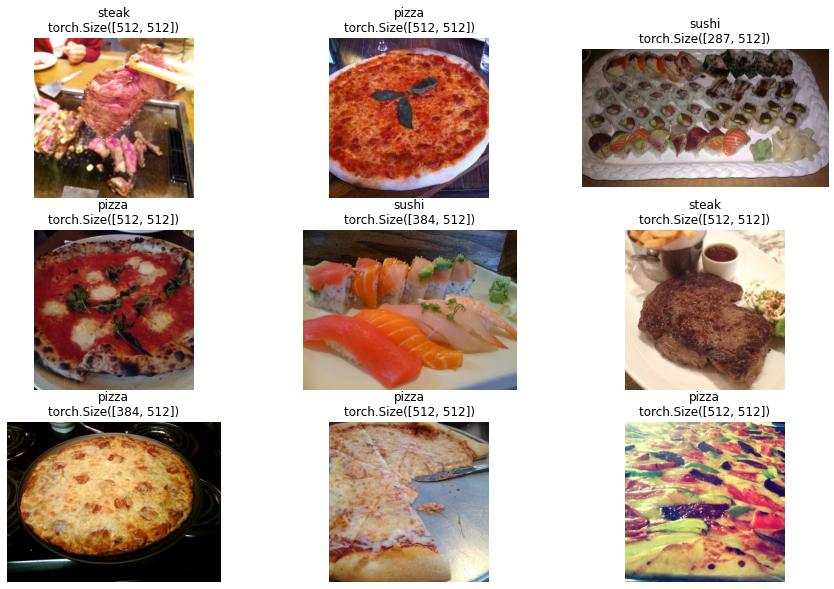

In [31]:
plot_random_images_from_our_custom_dataset(a)

In [32]:
from torch.utils.data import DataLoader

In [33]:
train_cdataLoader = CustomDataLoader(train_dir , transform = transformer1)
train_cdataLoader

In [34]:
test_cdataLoader = CustomDataLoader(test_dir)
test_cdataLoader

In [35]:
train_data = DataLoader(train_cdataLoader , batch_size = 32 , shuffle = True , num_workers = os.cpu_count())
test_data = DataLoader(test_cdataLoader , batch_size = 32 , shuffle = True , num_workers = os.cpu_count())

In [36]:
train_transformer = transforms.Compose([
    transforms.Resize(size = (256 , 256)),
    #transforms.Pad(padding = 40 , fill = 128 , padding_mode = "constant"), # padding_mode = {"constant" , "edge" , "reflect" , "symmetric"}
    #transforms.CenterCrop(size = (128 , 128)),
    #transforms.FiveCrop(size = (100 , 100)),
    #transforms.Grayscale(),
    #transforms.ColorJitter(brightness = 0.9 , contrast = 0.3  ,saturation = 0.4 , hue = 0.5),
    #transforms.GaussianBlur(kernel_size = (15 , 15) , sigma = (0.3 , 0.9)),
    #transforms.RandomPerspective(),
    #transforms.RandomRotation(degrees = (0, 180)),
    #transforms.RandomAffine(degrees = (0 , 180)),
    #transforms.ElasticTransform(alpha = 128.0),
    #transforms.RandomCrop(size = (100 , 100)),
    #transforms.RandomResizedCrop(size = (128 , 128)),
    #transforms.RandomInvert(),
    #transforms.RandomPosterize(bits = 4),
    #transforms.RandomSolarize(threshold = 200.0),
    #transforms.TrivialAugmentWide(num_magnitude_bins = 10),
    transforms.ToTensor()
])

test_transformer = transforms.Compose([
    transforms.Resize(size = (256 , 256)),
    transforms.ToTensor()
])

In [37]:
img = train_transformer(Image.open("/content/MiniFoodVisioin/train/pizza/1008844.jpg"))

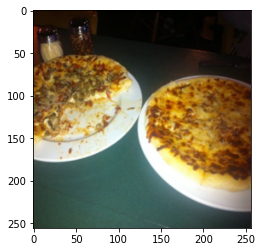

In [38]:
plt.imshow(img.permute((1 , 2 , 0)))

In [39]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

In [40]:
simple_transform = transforms.Compose([
    transforms.Resize(size = (64 , 64)),
    transforms.ToTensor()
])

In [41]:
simple_train_data = ImageFolder(train_dir , transform = simple_transform)
simple_test_data = ImageFolder(test_dir , transform = simple_transform)

In [42]:
simple_train_dataLoader = DataLoader(simple_train_data , batch_size = 32 , shuffle = True , num_workers = os.cpu_count())
simple_test_dataLoader = DataLoader(simple_test_data , batch_size = 32 , shuffle = False , num_workers = os.cpu_count())

In [43]:
class TinyVGG(torch.nn.Module):

  def __init__(self, input_size:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_block1 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels = input_size , out_channels = hidden_units , kernel_size = 3 , stride = 1 , padding = 0),
        torch.nn.ReLU(),
        torch.nn.Conv2d(in_channels = hidden_units , out_channels = hidden_units , kernel_size= 3  , stride = 1 , padding = 0),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size = 2 , stride = 1)
    )

    self.conv_block2 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels = hidden_units , out_channels = hidden_units , kernel_size = 3 , stride = 1 , padding = 0),
        torch.nn.ReLU(),
        torch.nn.Conv2d(in_channels = hidden_units , out_channels = hidden_units , kernel_size = 3 , stride = 1 , padding = 0 ),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size = 2 , stride = 1)
    )

    self.dense_block = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(in_features = hidden_units * 54 * 54  , out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block1(x)
    #print(x.shape)
    x = self.conv_block2(x)
    #print(x.shape)
    x = self.dense_block(x)
    return x
    #return self.dense_block(self.conv_block2(self.conv_block1(x)))

In [44]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model0 = TinyVGG(input_size = 3 , hidden_units = 10 , output_shape = 3).to(device)
model0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (dense_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=29160, out_features=3, bias=True)
  )
)

In [45]:
try:
  import torchinfo
  from torchinfo import summary
except:
  print("torchinfo does not exist...\ninstalling...")
  !pip install torchinfo
  from torchinfo import summary

torchinfo does not exist...
installing...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
summary(model0 , input_size = (1 , 3 , 64 , 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 59, 59]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 59, 59]           --
├─Sequential: 1-2                        [1, 10, 54, 54]           --
│    └─Conv2d: 2-6                       [1, 10, 57, 57]           910
│    └─ReLU: 2-7                         [1, 10, 57, 57]           --
│    └─Conv2d: 2-8                       [1, 10, 55, 55]           910
│    └─ReLU: 2-9                         [1, 10, 55, 55]           --
│    └─MaxPool2d: 2-10                   [1, 10, 54, 54]           --
├─Sequentia

In [47]:
def train_model(model:torch.nn.Module,
                data:torch.utils.data.DataLoader,
                loss_fn:torch.nn.Module,
                optimizer:torch.optim.Optimizer,
                device = device):
  
  accuracy = []
  loss = []

  model.train()

  for batch , (X , y) in enumerate(data):

    X , y = X.to(device) , y.to(device)

    train_logits = model(X)

    train_loss = loss_fn(train_logits , y)
    loss.append(train_loss.item())

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    train_predicts = torch.argmax(torch.softmax(train_logits , dim = 1) , dim = 1)
    train_accuracy = sum(train_predicts == y for train_predicts , y in zip(train_predicts , y))/len(y)
    accuracy.append(train_accuracy)
  
  acc = sum(accuracy)/len(data)
  loss = sum(loss)/len(data)

  return acc.item()*100 , loss

In [48]:
def test_model(model:torch.nn.Module,
               data:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               device = device):
  
  accuracy = []
  loss = []

  model.eval()

  with torch.inference_mode():
    for batch , (X , y) in enumerate(data):
      X , y = X.to(device) , y.to(device)

      test_logits = model(X)

      test_loss = loss_fn(test_logits , y)
      loss.append(test_loss)

      test_predicts = torch.argmax(torch.softmax(test_logits , dim = 1) , dim = 1)
      test_accuracy = sum(test_predicts == y for test_predicts , y in zip(test_predicts , y)) / len(y)
      accuracy.append(test_accuracy)
    
    acc = sum(accuracy) / len(data)
    loss = sum(loss) / len(data)

    return acc.item() * 100 , loss.item()

In [51]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

def train(model:torch.nn.Module,epochs:int, train_data:torch.utils.data.DataLoader,
          test_data:torch.utils.data.DataLoader, loss_fn:torch.nn.Module,
          optimizer:torch.optim.Optimizer, device = device):
  
  result_values = {"test_loss":[],
                   "train_loss":[],
                   "test_accuracy":[],
                   "train_accuracy":[]}

  test_loss_values = []
  test_accuracy_values = []
  train_loss_values = []
  train_accuracy_values = []

  start_time = timer()

  for epoch in tqdm(range(epochs)):
    train_acc , train_loss = train_model(model , train_data , loss_fn , optimizer , device)

    test_acc , test_loss = test_model(model , test_data , loss_fn , device)

    test_loss_values.append(test_loss)
    test_accuracy_values.append(test_acc)
    train_loss_values.append(train_loss)
    train_accuracy_values.append(train_acc)

    print(f"Epoch {epoch} | Train Loss: {train_loss:0.4f} | Train Accuracy: {train_acc:0.2f} | Test Loss: {test_loss:0.4f} | Test Accuracy: {test_acc:0.2f} ")

  end_time = timer()
  process_time = end_time - start_time
  print(f"\nProcess Time: {process_time:0.2f} seconds")

  result_values["test_loss"] = test_loss_values
  result_values["test_accuracy"] = test_accuracy_values
  result_values["train_loss"] = train_loss_values
  result_values["train_accuracy"] = train_accuracy_values
  
  return result_values


In [69]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model0.parameters() , lr = 0.0001)
values = train(model0 , epochs = 5 , train_data= simple_train_dataLoader , test_data = simple_test_dataLoader , loss_fn = loss_fn , optimizer = optimizer , device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0 | Train Loss: 1.0232 | Train Accuracy: 54.30 | Test Loss: 1.0794 | Test Accuracy: 37.22 
Epoch 1 | Train Loss: 1.0546 | Train Accuracy: 35.94 | Test Loss: 1.1079 | Test Accuracy: 29.07 
Epoch 2 | Train Loss: 1.0364 | Train Accuracy: 36.33 | Test Loss: 1.1165 | Test Accuracy: 23.96 
Epoch 3 | Train Loss: 0.9976 | Train Accuracy: 57.81 | Test Loss: 1.0823 | Test Accuracy: 30.21 
Epoch 4 | Train Loss: 0.9872 | Train Accuracy: 60.55 | Test Loss: 0.9990 | Test Accuracy: 46.31 

Process Time: 16.89 seconds


In [70]:
def plot_loss_accuracy_curves(results:dict):
  ''' plot loss and accuracy curves of the trained model'''

  train_loss = results["train_loss"]
  train_accuracy = results["train_accuracy"]
  test_loss = results["test_loss"]
  test_accuracy = results["test_accuracy"]
  epochs = range(len(test_accuracy))

  plt.figure(figsize = (15 , 8))

  plt.subplot(1 , 2 , 1)
  plt.plot(epochs , train_loss , label = "Train Loss")
  plt.plot(epochs , test_loss , label = "Test Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.title("Loss Curve")
  plt.legend()

  plt.subplot(1 , 2 , 2)
  plt.plot(epochs , train_accuracy , label = "Train Accuracy")
  plt.plot(epochs , test_accuracy , label = "Test Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.title("Accuracy Curve")
  plt.legend()

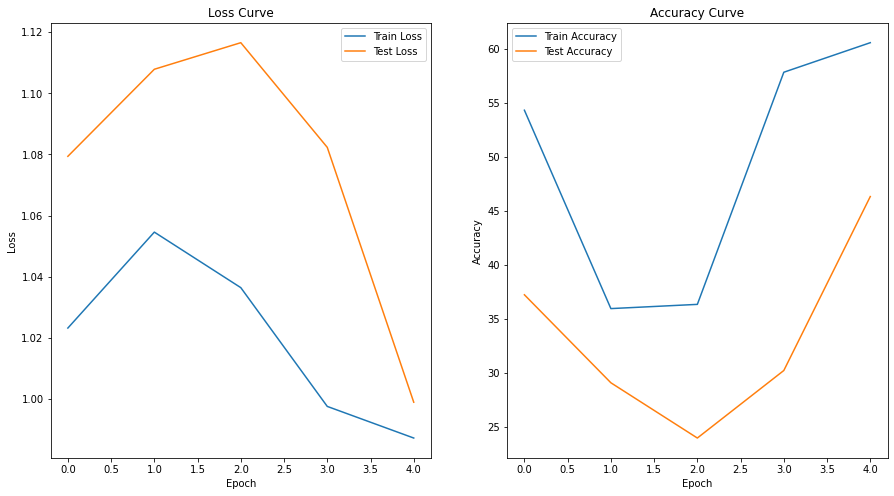

In [71]:
plot_loss_accuracy_curves(values)